In [ ]:
!pip install rioxarray geopandas earthpy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

sns.set_style("white")
sns.set(font_scale=1.5)

data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [2]:
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

print(sjer_roads.crs)
print(sjer_aoi.crs)

EPSG:4269
EPSG:32611


In [3]:
sjer_aoi_wgs84 = sjer_aoi.to_crs(epsg=4269)

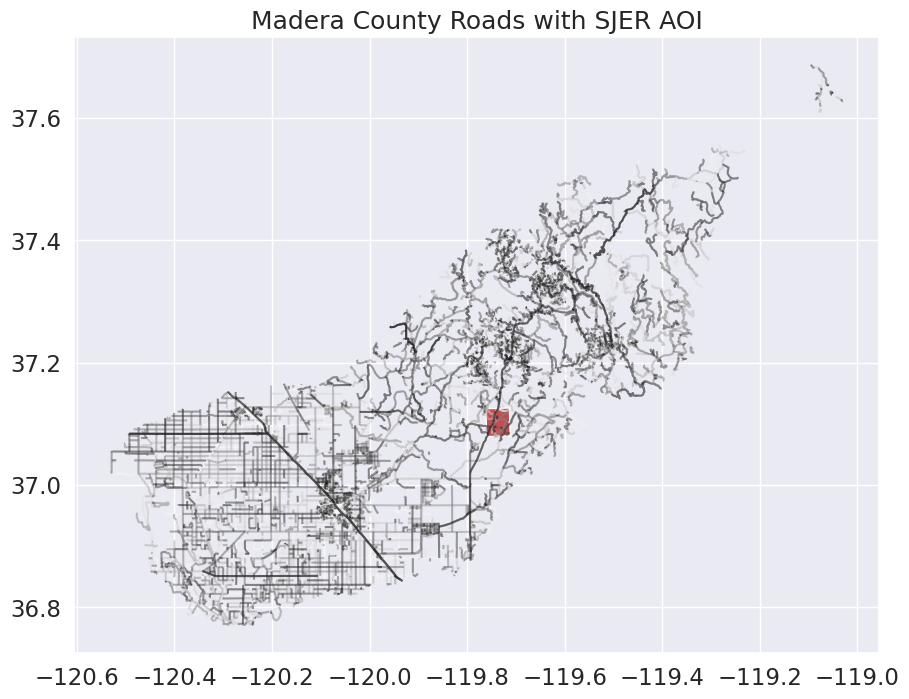

In [4]:

fig, ax = plt.subplots(figsize=(12,8))

sjer_roads.plot(ax=ax, alpha=0.5, cmap="Greys")
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color="r")
ax.set_title("Madera County Roads with SJER AOI")
plt.show()

In [5]:

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", "usa", "usa-states-census-2014.shp")

state_boundary_us = gpd.read_file(state_boundary_us_path)

type(state_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [6]:
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


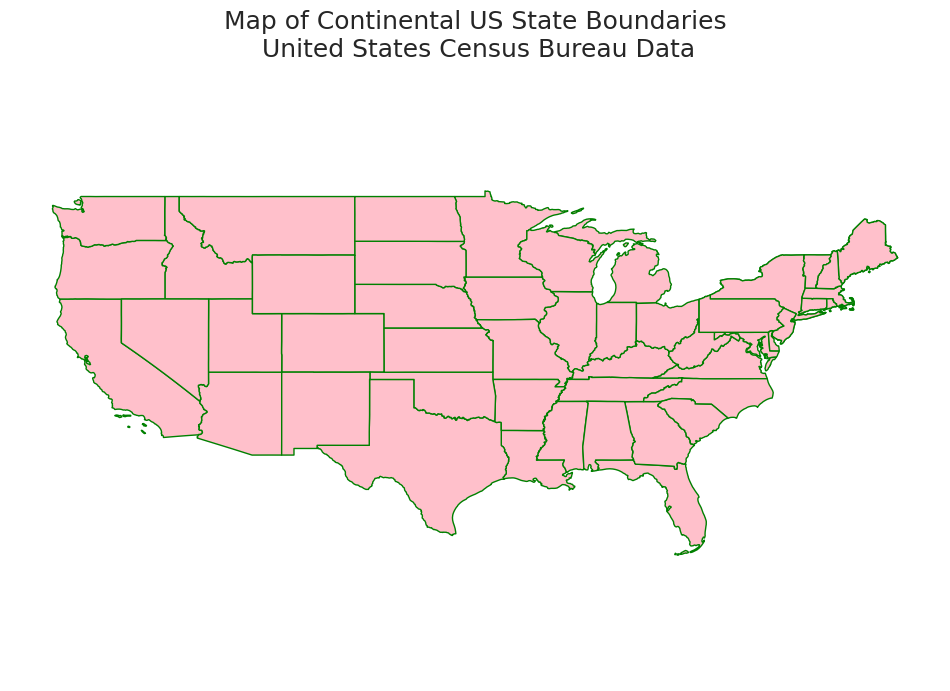

In [7]:

fig, ax = plt.subplots(figsize=(12,8))

state_boundary_us.plot(ax=ax, facecolor="pink", edgecolor="green")

ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

plt.axis("equal")
ax.set_axis_off()

plt.show()

In [8]:
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", "usa", "usa-boundary-dissolved.shp")

country_boundary_us = gpd.read_file(country_boundary_us_path)

type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

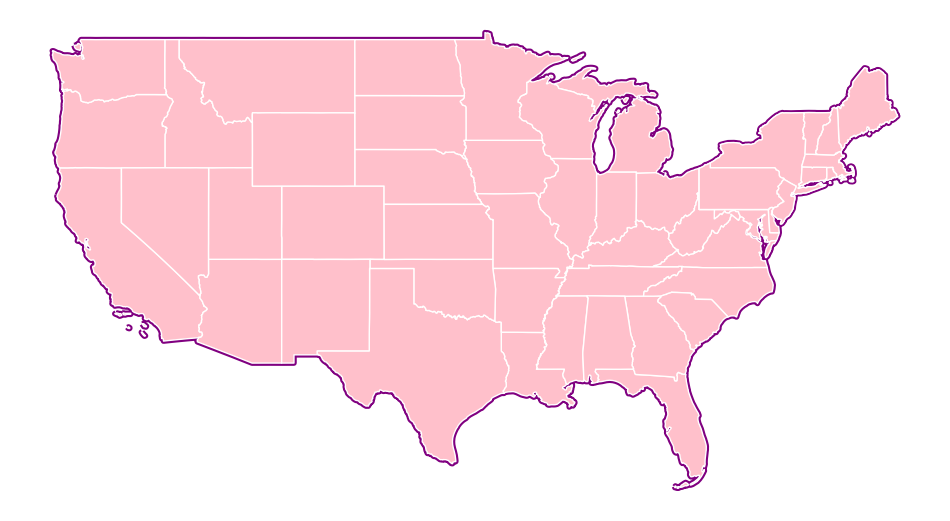

In [9]:

fig, ax = plt.subplots(figsize=(12,7))

country_boundary_us.plot(ax=ax, alpha=1, edgecolor="purple", color="red", linewidth=4)
state_boundary_us.plot(ax=ax, color="pink", edgecolor="white", linewidth=1)

ax.set_axis_off()
plt.show()

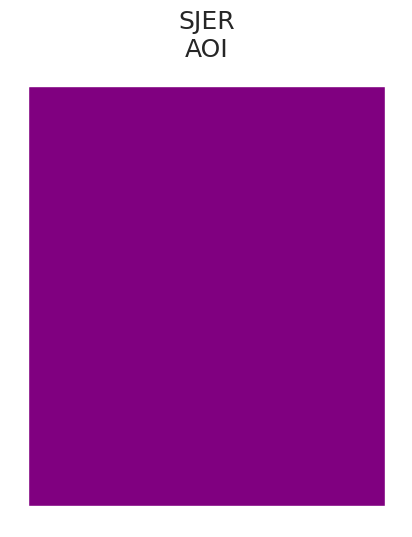

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

sjer_aoi.plot(ax=ax, color="purple")

ax.set(title="SJER\nAOI")

ax.set_axis_off()

plt.show()

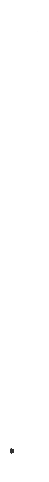

In [14]:
fig, ax = plt.subplots(figsize=(6,6))

country_boundary_us.plot(ax=ax, edgecolor="black", color="white", linewidth=3, alpha=0.8)
state_boundary_us.plot(ax=ax, edgecolor="gray", color="white")
sjer_aoi.plot(ax=ax, color="indigo")

ax.set_axis_off()
plt.show()

In [15]:
print(sjer_aoi.crs)
print(country_boundary_us.crs)
print(state_boundary_us.crs)

EPSG:32611
EPSG:4326
EPSG:4326


In [16]:
print(sjer_aoi.total_bounds)
print(state_boundary_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]


In [17]:
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

print(sjer_aoi_WGS84.total_bounds)
print(sjer_aoi_WGS84.crs)
print(state_boundary_us.crs)

[-119.76262834   37.07990136 -119.71268568   37.12656698]
EPSG:4326
EPSG:4326


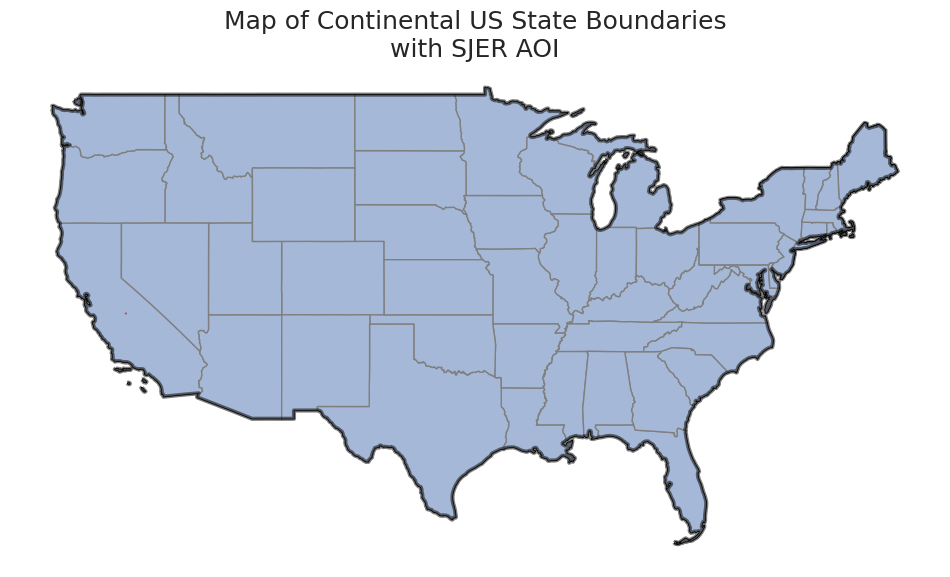

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

state_boundary_us.plot(ax=ax, linewidth=1, edgecolor="black")
country_boundary_us.plot(ax=ax, edgecolor="black", color="white", linewidth=3, alpha=0.5)
sjer_aoi_WGS84.plot(ax=ax, color="indigo", edgecolor="r")

ax.set(title="Map of Continental US State Boundaries\nwith SJER AOI")
ax.set_axis_off()
plt.show()

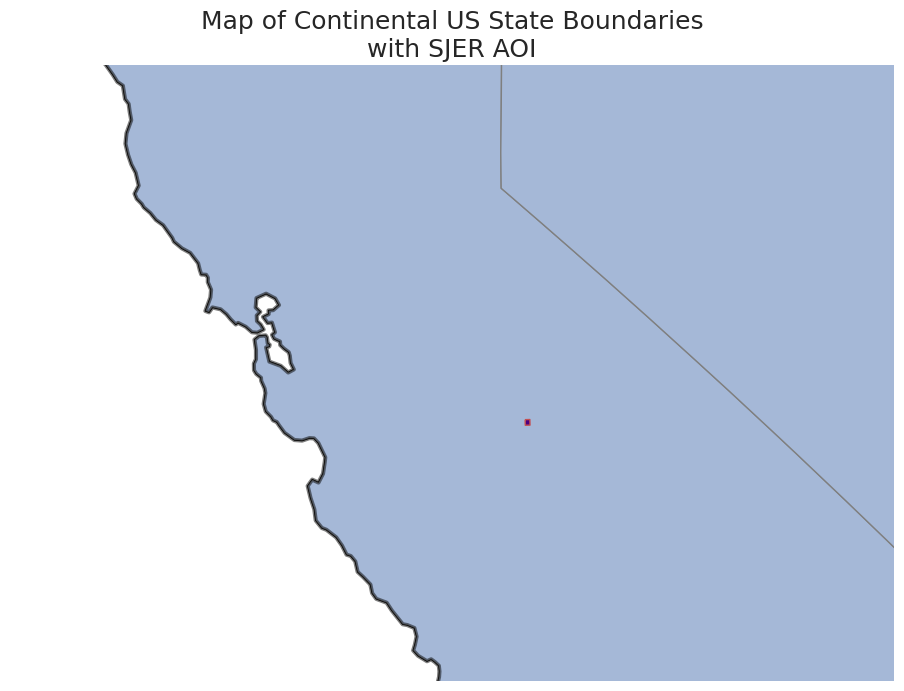

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

state_boundary_us.plot(ax=ax, linewidth=1, edgecolor="black")
country_boundary_us.plot(ax=ax, edgecolor="black", color="white", linewidth=3, alpha=0.5)
sjer_aoi_WGS84.plot(ax=ax, color="indigo", edgecolor="r")

ax.set(title="Map of Continental US State Boundaries\nwith SJER AOI")

ax.set(xlim=[-125, -116], ylim=[35, 40])

ax.set_axis_off()
plt.show()

In [20]:
AOI_point = sjer_aoi_WGS84["geometry"].centroid

/tmp/ipykernel_8923/1655453269.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  AOI_point = sjer_aoi_WGS84["geometry"].centroid


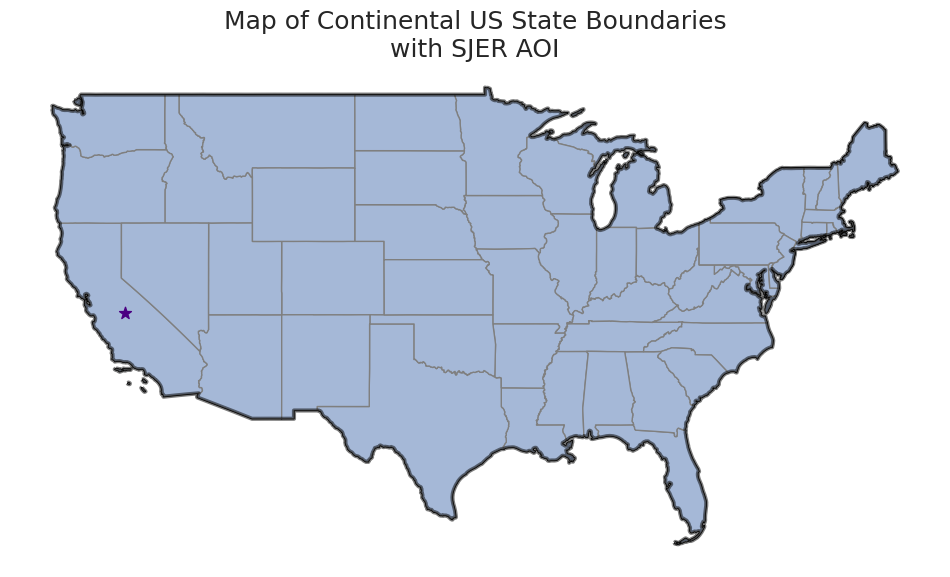

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

state_boundary_us.plot(ax=ax, linewidth=1, edgecolor="black")
country_boundary_us.plot(ax=ax, edgecolor="black", color="white", linewidth=3, alpha=0.5)
AOI_point.plot(ax=ax, markersize=80, color="indigo", marker="*")

ax.set(title="Map of Continental US State Boundaries\nwith SJER AOI")

#ax.set(xlim=[-125, -116], ylim=[35, 40])

ax.set_axis_off()
plt.show()